In [9]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from diff_ev import ClusterDifferentialEvolution
import re
from IPython.display import clear_output

In [17]:
df = pd.read_csv('experiments/FLOCKING_5.csv')

def to_np(x):
    x = x.to_list()
    res = []
    for i in x:
        numbers = re.findall(r'\d+\.\d+', i)
        array = np.array([float(num) for num in numbers])
        res.append(array)
    return np.array(res)

score = []
T = to_np(df['T'])
target_distance = to_np(df['target_distance'])
dead = to_np(df['dead'])
convexity = to_np(df['convexity'])
for i in range(len(T)):
    score.append(ClusterDifferentialEvolution.score(T[i], target_distance[i], dead[i], convexity[i]))


df['score'] = score
clear_output()

4487.893511402748
4185.821354770411
3741.108311152706
4349.700713171363
4552.107840430888
3743.4956862338795
4514.745409748124
4007.1083995538247
4509.478376167393
4457.221040865624
3400.9695448383072
4269.762924833293
4574.968775994168
3901.2582527737122
3043.1165581654022
4414.130793856693
3923.1462763293703
4431.513938480313
4284.099162573198
4586.754865338442
4178.012845667172
2691.012042665509
3753.702824192679
3943.921879537539
3433.6288221314953
3851.57966286772
4311.300920529369
4395.557669819454
4454.750915625838
3917.3786338841865
4080.022590726726
4178.88821545565
4316.138571681272
4159.845139448923
3810.463538135072
4551.21314413112
4405.108280315179
4035.936365521698
3205.099268491631
4155.770382447803
4269.688932517963
4143.850852428015
4204.767299645496
4043.11896290816
4088.5183057845716
4046.60964183522
4557.544071778568
3925.2897784162483
4058.5027149573634
4313.467981605659
4136.955302807926
4144.280052011166
3917.6730331335657
4161.068188631036
4271.804502221503
429

In [22]:
generations_mean = []
generations_min = []
n = len(df['generation'].drop_duplicates())
for i in range(-1, n - 1):
    generation = df.loc[lambda x: x['generation'] == i]
    T = to_np(generation['T'])
    target_distance = to_np(generation['target_distance'])
    dead = to_np(generation['dead'])
    convexity = to_np(generation['convexity'])
    score = generation['score'].to_numpy()
    mean = {'T': np.mean(T), 'target_distance': np.mean(target_distance), 'dead': np.mean(dead), 'convexity': np.mean(convexity), 'score': np.mean(score)}
    min_ = {'T': np.min(np.mean(T, axis=1)), 'target_distance': np.min(np.mean(target_distance, axis=1)), 'dead': np.min(np.mean(dead, axis=1)), 'convexity': np.min(np.mean(convexity, axis=1)), 'score': np.min(score)}
    generations_mean.append(mean)
    generations_min.append(min_)

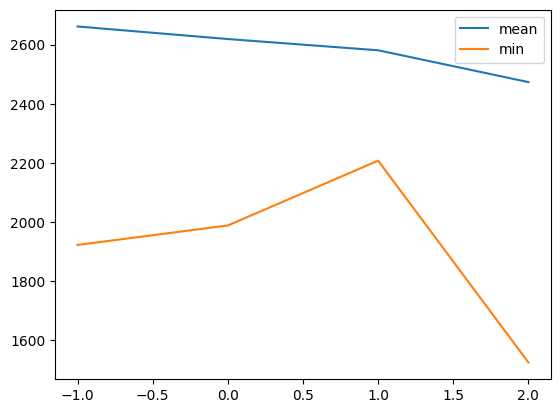

In [23]:
T_mean = [generations['T'] for generations in generations_mean]
T_min = [generations['T'] for generations in generations_min]

plt.plot(range(-1, n - 1), T_mean, label='mean')
plt.plot(range(-1, n - 1), T_min, label='min')
plt.legend()
plt.show()